In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


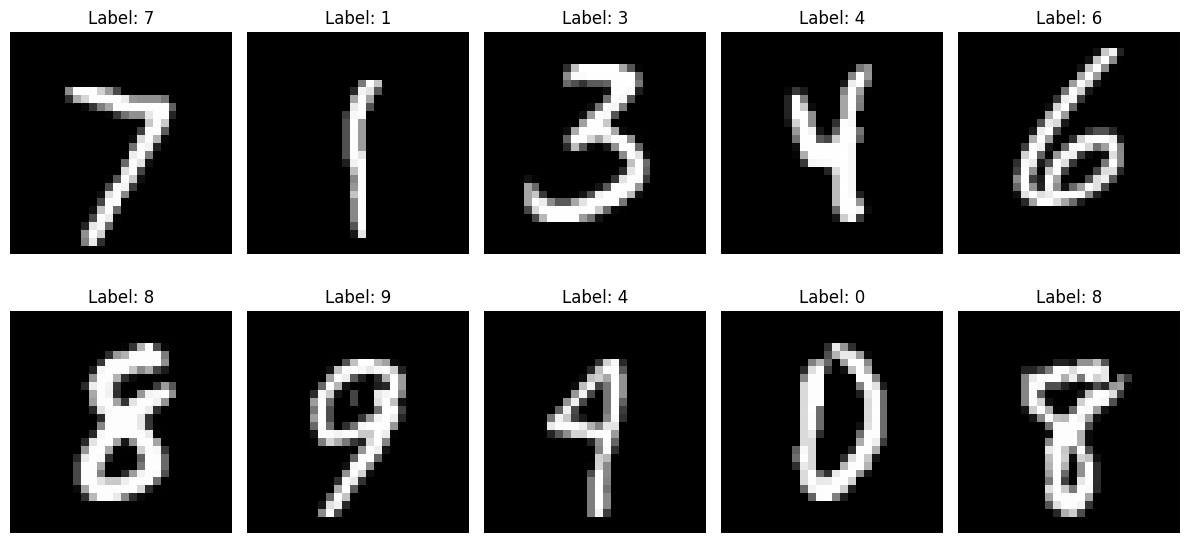

In [ ]:
num_rows, num_cols = 2, 5 
num_images = num_rows * num_cols

random_indices = np.random.choice(X_train.shape[0], num_images, replace=False)

plt.figure(figsize=(12, 6)) 

for i, index in enumerate(random_indices, 1): 
    plt.subplot(num_rows, num_cols, i) 
    plt.imshow(X_train[index], cmap='gray') 
    plt.title(f"Label: {y_train[index]}") 
    plt.axis('off') 
    
plt.tight_layout()
plt.show()


In [24]:
X_train = X_train/255
X_test = X_test/255

In [41]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

/tmp/ipython-input-322334945.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipython-input-322334945.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/tmp/ipython-input-322334945.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/tmp/ipython-input-322334945.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTe

In [42]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

lossfun = nn.CrossEntropyLoss() # Cross-Entropy Loss = Log Softmax + Negative Log Likelihood
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [43]:
epochs = 1000

for epoch in range(epochs):

    optimizer.zero_grad()

    y_hat = model(X_train)      # forward
    loss = lossfun(y_hat, y_train)

    loss.backward()             # backprop
    optimizer.step()            # update

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 2.3049
Epoch 200, Loss: 0.0093
Epoch 400, Loss: 0.0008
Epoch 600, Loss: 0.0003
Epoch 800, Loss: 0.0001


In [55]:
pred = model(X_test)
pred = pred.argmax(axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred) * 100)


97.17
